In [1]:
import numpy as np
import pulp

In [2]:
prob = pulp.LpProblem('Beer or Ale', pulp.LpMaximize)

In [3]:
# set up decision variables
beer = pulp.LpVariable('beer', lowBound=0, cat='Integer')
ale = pulp.LpVariable('ale', lowBound=0, cat='Integer')

In [4]:
# model weekly revenues from beer and ale sales
revenues = 23 * beer + 13 * ale
profit = revenues
prob += profit

In [5]:
# add constraints for available hops
hops = (4 * ale) + (4 * beer)
prob += (hops <= 160)

# add constraints for available corn
corn = (5 * ale) + (15 * beer)
prob += (corn <= 480)

# add constraint for available malt
malt = (35 * ale) + (20 * beer)
prob += (malt <= 1190)

In [6]:
print prob

Beer or Ale:
MAXIMIZE
13*ale + 23*beer + 0
SUBJECT TO
_C1: 4 ale + 4 beer <= 160

_C2: 5 ale + 15 beer <= 480

_C3: 35 ale + 20 beer <= 1190

VARIABLES
0 <= ale Integer
0 <= beer Integer



In [7]:
# solve the LP using the default solver
optimization_result = prob.solve()

# make sure we got an optimal solution
assert optimization_result == pulp.LpStatusOptimal

# display the results
for var in (ale, beer):
    print('Optimal weekly number of {} to produce: {:1.0f}'.format(var.name, var.value()))

Optimal weekly number of ale to produce: 12
Optimal weekly number of beer to produce: 28


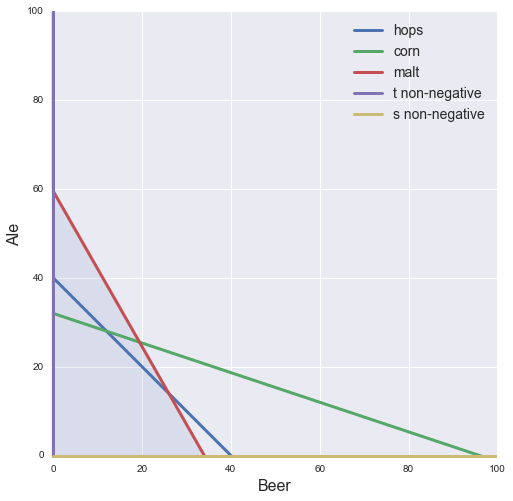

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# use seaborn to change the default graphics to something nicer
# and set a nice color palette
import seaborn as sns
# sns.set_color_codes('Set1')

# create the plot object
fig, ax = plt.subplots(figsize=(8, 8))
a = np.linspace(0, 100)

# add carpentry constraint: trains <= 80 - soldiers
plt.plot(a, 40 - a, lw=3, label='hops')
#plt.fill_between(a, 0, 40 - a, alpha=0.1)

# add finishing constraint: trains <= 100 - 2*soldiers
plt.plot(a, (480 - 5*a)/15, lw=3, label='corn')
plt.fill_between(a, 0, (480 - 5*a)/15, alpha=0.1)

# add demains constraint: soldiers <= 40
plt.plot(a, (1190 - 35*a)/20, lw=3, label='malt')
plt.fill_betweenx(a, 0, (1190 - 20*a)/35, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(a), a, lw=3, label='t non-negative')
plt.plot(a, np.zeros_like(a), lw=3, label='s non-negative')

# highlight the feasible region
# path = Path([
#     (0., 0.),
#     (0., 80.),
#     (20., 60.),
#     (40., 20.),
#     (40., 0.),
#     (0., 0.),
# ])
# patch = PathPatch(path, label='feasible region', alpha=0.5)
# ax.add_patch(patch)

# labels and stuff
plt.xlabel('Beer', fontsize=16)
plt.ylabel('Ale', fontsize=16)
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend(fontsize=14)
plt.show()